In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 140

In [6]:
def parse_time_col(col):
    return list(map(parse_time, col))

def parse_time(t):
    hour, minute = map(int, t.split(":"))
    return 60*hour + minute

def load_dataframe(country):
    df = pd.read_csv(f"{country}.csv")
    df.rename(columns={"Unnamed: 0": "day"}, inplace=True)
    return df

COLOUR = "#FFFAAE"

MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def plot(country):
    df = load_dataframe(country)
    sunrise_times = parse_time_col(df.sunrise)
    sunset_times = parse_time_col(df.sunset)
    overflow_xs = []
    overflow_ys = []
    for day in range(len(sunrise_times)):
        if sunrise_times[day] > sunset_times[day]:
            overflow_xs.append(day)
            overflow_ys.append(sunset_times[day])
            sunset_times[day] = parse_time("24:00")
    days = df.day
    datapoints = zip(days, sunrise_times, sunset_times)
    # times where sunrise time = sunset time are polar nights.
    # i.e. all dark. so don't do any fill there.
    datapoints = [dp for dp in datapoints if dp[1] != dp[2]]
    # now there'll be gaps.
    # to avoid gaps being filled in, have to split the datapoints into
    # groups.
    start = 0
    while start < len(datapoints):
        end = start+1
        while (end < len(datapoints)
                and datapoints[end][0] == datapoints[end-1][0]+1):
            end += 1
        days, sunrise_times, sunset_times = zip(*datapoints[start:end])
        plt.fill_between(days,
                     sunrise_times,
                     sunset_times,
                     color=COLOUR)
        start = end
    plt.fill_between(overflow_xs, overflow_ys, color=COLOUR)
    plt.xlabel("month")
    plt.ylabel("time")
    plt.title(country.capitalize())
    yticks = [f"{h}:00" for h in range(1, 24, 2)]
    plt.yticks([parse_time(t) for t in yticks], yticks)
    plt.xticks([df[df.month == month].first_valid_index()
                for month in range(1, len(MONTHS)+1)],
               MONTHS)
    plt.ylim(bottom=parse_time("0:00"), top=parse_time("24:00"))
    plt.xlim(left=0, right=max(df.day))

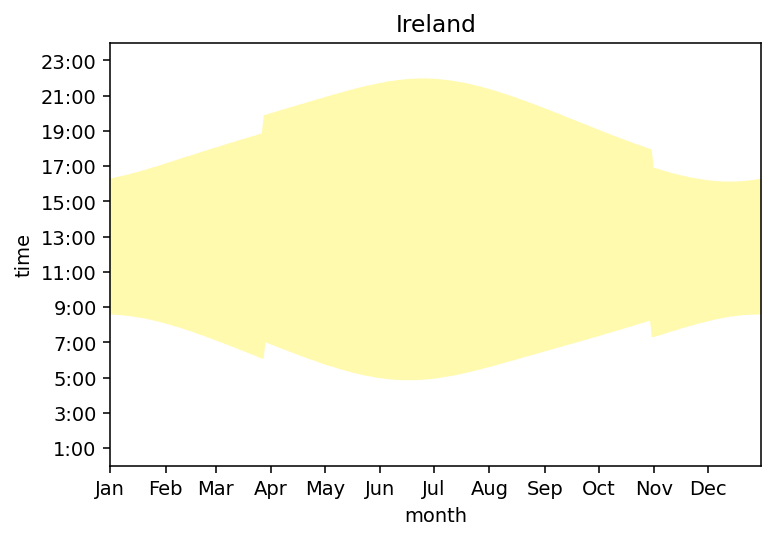

In [7]:
plot("ireland")

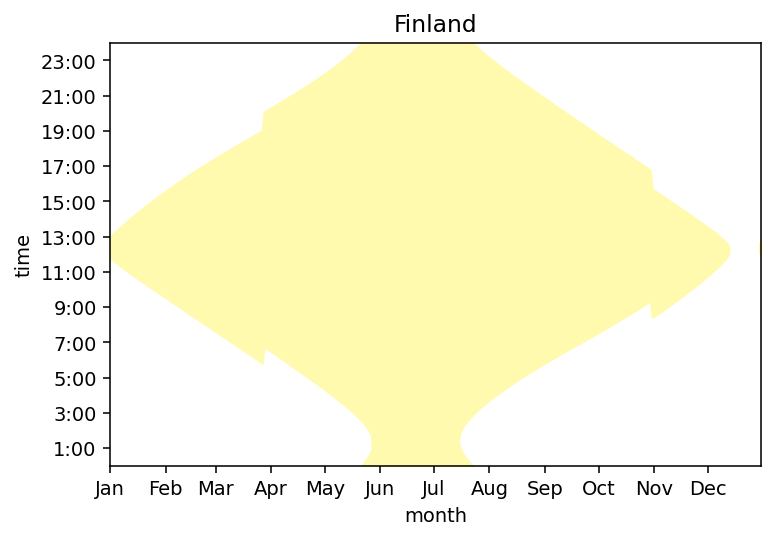

In [8]:
plot("finland")

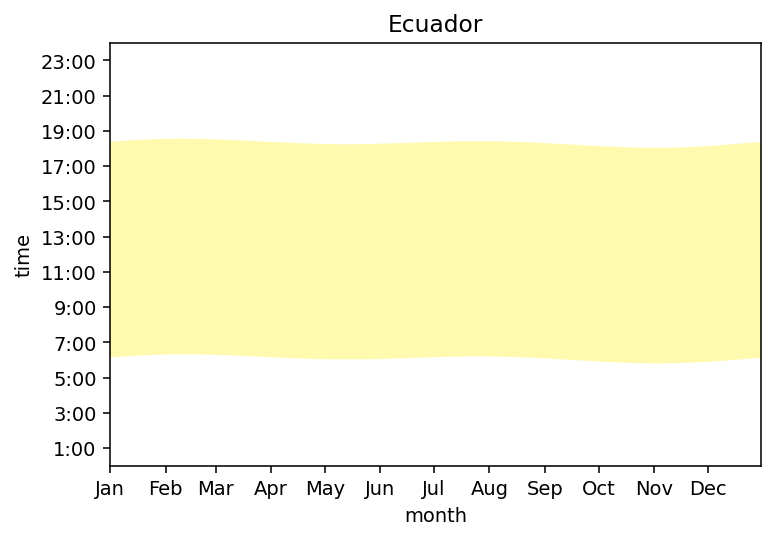

In [9]:
plot("ecuador")

### Debugging Finland

In [ ]:
df = load_dataframe("finland")

In [35]:
with pd.option_context('display.max_rows', None):
    display(df)

,day,month,date,sunrise,sunset
0,0,1,"Fri, January 1",11:49,12:58
1,1,1,"Sat, January 2",11:43,13:05
2,2,1,"Sun, January 3",11:38,13:11
3,3,1,"Mon, January 4",11:33,13:17
4,4,1,"Tue, January 5",11:28,13:23
5,5,1,"Wed, January 6",11:23,13:29
6,6,1,"Thu, January 7",11:18,13:34
7,7,1,"Fri, January 8",11:14,13:40
8,8,1,"Sat, January 9",11:09,13:45
9,9,1,"Sun, January 10",11:05,13:50
